In [1]:
import pandas as pd 
import numpy as np
from neupy import algorithms
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import preprocessing
import sklearn.metrics as sklm

# Identifikasi data
credit=pd.read_csv("german_credit.csv")
credit.info()

In [ ]:
# OneHotEncoding
label = np.array(credit['default'])
def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ohe = preprocessing.OneHotEncoder(categories = 'auto')
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['credit_history', 'purpose', 'savings','present_emp_since','personal_status_sex', 
                    'other_debtors', 'property','other_installment_plans', 'housing' , 'job' , 'telephone' , 'foreign_worker']
atribut = encode_string(credit['account_check_status'])
for col in categorical_columns:
    temp = encode_string(credit[col])
    atribut = np.concatenate([atribut, temp], axis = 1)
atribut = np.concatenate([atribut, np.array(credit[['duration_in_month','credit_amount',
                                                    'installment_as_income_perc','present_res_since','age',
                                                   'credits_this_bank','people_under_maintenance']])], axis = 1)

In [ ]:
# Data Transformation
scaler = preprocessing.StandardScaler().fit(atribut)
atribut = scaler.transform(atribut)

1.62
(array([7021], dtype=int64),)


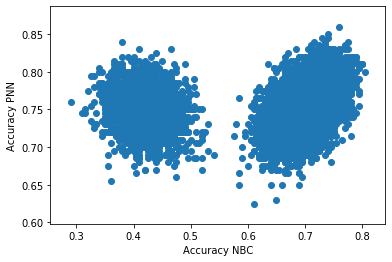

Average accuracy NBC = 0.643
Average accuracy PNN = 0.752



In [2]:
# Data Splitting + PNN + NBC
max_atr = np.amax(atribut)
min_atr = np.amin(atribut)
stdv = (max_atr-min_atr)/2
arr_acc1 = np.array([0])
arr_acc2 = np.array([0])
sum_acc = np.array([0])
for i in range(10000):
    nr.seed(i)
    indx = range(atribut.shape[0])
    indx = ms.train_test_split(indx, test_size = 200)
    X_train = atribut[indx[0],:]
    y_train = np.ravel(label[indx[0]])
    X_test = atribut[indx[1],:]
    y_test = np.ravel(label[indx[1]])
    NB_mod = GaussianNB()
    NB_mod.fit(X_train,y_train)
    scores1 = NB_mod.predict(X_test)
    pnn = algorithms.PNN(std=stdv, verbose=False)
    pnn.train(X_train, y_train)
    scores2 = pnn.predict(X_test);
    acc1 = sklm.accuracy_score(y_test, scores1)
    arr_acc1 = np.concatenate([arr_acc1, np.array([acc1])])
    acc2 = sklm.accuracy_score(y_test, scores2)
    arr_acc2 = np.concatenate([arr_acc2, np.array([acc2])])
    sum = acc1 + acc2
    sum_acc = np.concatenate([sum_acc, np.array([sum])])
max_sum_acc = np.amax(sum_acc)
print(max_sum_acc)
index_max_sum_acc = np.where(sum_acc == max_sum_acc)
print(index_max_sum_acc)
# Hasil
plt.scatter(arr_acc1[1:], arr_acc2[1:])
plt.xlabel('Accuracy NBC')
plt.ylabel('Accuracy PNN')
plt.show()
avg_acc1 = 0
avg_acc2 = 0
for i in range(10000):
    avg_acc1 = avg_acc1 + arr_acc1[i]
    avg_acc2 = avg_acc2 + arr_acc2[i]
avg_acc1 = avg_acc1/10000
avg_acc2 = avg_acc2/10000
print('Average accuracy NBC = %.3f' % avg_acc1)
print('Average accuracy PNN = %.3f' % avg_acc2)
print('')

In [3]:
nr.seed(7020)
indx = range(atribut.shape[0])
indx = ms.train_test_split(indx, test_size = 200)
X_train = atribut[indx[0],:]
y_train = np.ravel(label[indx[0]])
X_test = atribut[indx[1],:]
y_test = np.ravel(label[indx[1]])
NB_mod = GaussianNB()
NB_mod.fit(X_train,y_train)
scores1 = NB_mod.predict(X_test)
pnn = algorithms.PNN(std=stdv, verbose=False)
pnn.train(X_train, y_train)
scores2 = pnn.predict(X_test)
def print_metrics(label, scores):
        conf = sklm.confusion_matrix(label, scores)
        print('             Confusion matrix')
        print('             Score 0   Score 1')
        print('Actual 0   %6d' % conf[0,0] + '      %5d' % conf[0,1])
        print('Actual 1   %6d' % conf[1,0] + '      %5d' % conf[1,1])
        print('')
        print('Accuracy = %0.3f' % sklm.accuracy_score(label, scores))
nb = print_metrics(y_test, scores1)
pn = print_metrics(y_test, scores2)

             Confusion matrix
             Score 0   Score 1
Actual 0      112         35
Actual 1       13         40

Accuracy = 0.760
             Confusion matrix
             Score 0   Score 1
Actual 0      142          5
Actual 1       23         30

Accuracy = 0.860
